In [351]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import heapq
import pandas as pd
import pickle as pkl
import scipy.stats as stat
import seaborn as sns

In [107]:
D = nx.DiGraph(name="river_network")
D.add_nodes_from(range(1, 16))


D.add_node(1,pos=(100,2))
D.add_node(2,pos=(110,7))
D.add_node(3,pos=(118,12))
D.add_node(4,pos=(125,15))
D.add_node(5,pos=(130,1))
D.add_node(6,pos=(137,3))
D.add_node(7,pos=(140,12))
D.add_node(8,pos=(120,35))
D.add_node(9,pos=(114,25))
D.add_node(10,pos=(115,73))
D.add_node(11,pos=(133,27))
D.add_node(12,pos=(129,33))
D.add_node(13,pos=(136,44))
D.add_node(14,pos=(126,63))
D.add_node(15,pos=(120,108))
D.add_node(16,pos=(125,180))

D.add_edges_from(
    [
        (1, 10),
        (2, 9),
        (3, 9),
        (4, 12),
        (5, 11),
        (6, 11),
        (7, 13),
        (8, 14),
        (9, 10),
        (11, 12),
        (12, 13),
        
        (13, 14),
        (14, 15),
        (10, 15),
        (15, 16),
    ]
)
labels = {
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "10",
    11: "11",
    12: "12",
    13: "13",
    14: "14",
    15: "15",
    16: "16",
    17: "17",
    18: "18",
    19: "19",
}

D = D.reverse()
#pos = nx.spring_layout(D)


pos=nx.get_node_attributes(D,'pos')


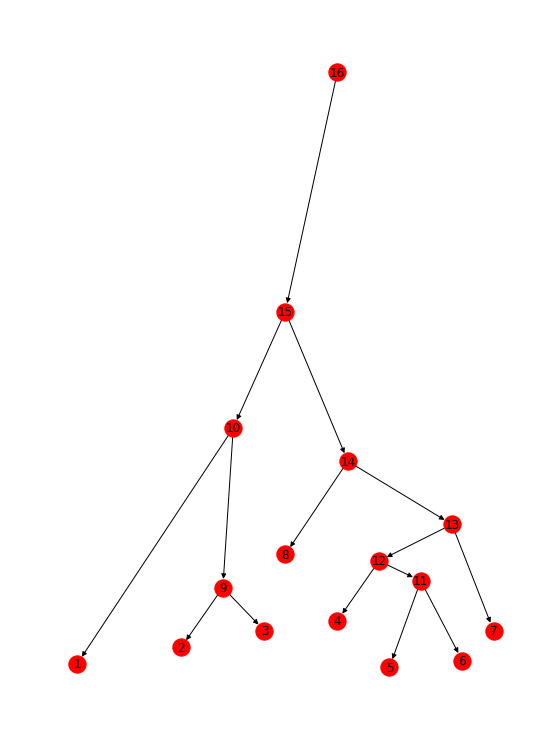

In [113]:
plt.figure(figsize=(7,10))
nx.draw(D, pos,with_labels=labels, color='blue')
plt.show()



In [202]:
#Input should be a directed acyclic graph 
# with breadth-first node numbering
# Calculate R_b

def calc_Rb(D):
    
    if nx.is_directed_acyclic_graph(D) == False:
        return print('Input should be a directed acyclic graph')

    order_array = np.zeros(nx.number_of_nodes(D))

    for i in range(nx.number_of_nodes(D)-1,-1,-1):
        #print(i)
        if len(nx.descendants(D,i)) == 0 or len(nx.descendants(D,i)) == 1:
            order_array[i] = 1
        else:
            des_list = list(D.successors(i))
            des_list = [int(h) for h in des_list]
            max_orders = heapq.nlargest(2, order_array[des_list])            
         
            if len(max_orders) == 1:
                order_array[i] = max_orders[0]
            if len(max_orders) == 0:
                order_array[i] = 0
                
                  
            else:
                  

                if max_orders[0] == max_orders[1]:
                    order_array[i] = max_orders[0] + 1
                else:
                    order_array[i] = max_orders[0]
                    
    if len(order_array) < 1:
        R_b = 0
        
    else:

        R_i = int(max(order_array) - 1)
        R_b = np.zeros(R_i)

        for i in range(R_i):
            R_b[i] = sum(order_array == i+1)/sum(order_array == i+2)
        
        
    return R_b, order_array





In [274]:
#create array with r_b for all river simulations

slopes = [0.0002]#,0.0002,0.0004,0.0006,0.0008,0.001]
rb=np.zeros((4,30))
for i in range(1,31):
    count = 0
    for s in slopes:
        count += 1
        name = ('splits_slope_' + str(s) +'_version_' + str(i) +'.p')
        data_split = pkl.load(open(name, 'rb'))
        Graph = nx.DiGraph(data_split) 
        rb_in = calc_Rb(Graph)[0]
        if np.all(rb_in):
            len_rb = (len(rb_in))
            rb[0:len_rb,i-1] = rb_in
        
        

In [359]:
#Create array with R_l for all river simulations

slopes = [0.0001]#,0.0002,0.0004,0.0006,0.0008,0.001]
rl=np.zeros((4,30))
for i in range(1,31):
    count = 0
    for s in slopes:
        count += 1
        name = ('segments_slope_' + str(s) +'_version_' + str(i) +'.p')
        data_segment = pkl.load(open(name, 'rb'))
        for k, v in data_segment.items():
            data_segment[k] = len(v)
        
        name_sp = ('splits_slope_' + str(s) +'_version_' + str(i) +'.p')
        data_sp = pkl.load(open(name_sp, 'rb'))
        Graph = nx.DiGraph(data_sp) 
        order_arr = calc_Rb(Graph)[1]
        
        
        if np.all(calc_len_ratio(order_arr, data_segment)):
            len_rb = (len(calc_len_ratio(order_arr, data_segment)))
    
        #print(calc_len_ratio(order_arr, data_segment))
        
        rl[0:len_rb,i-1] = calc_len_ratio(order_arr, data_segment)


In [360]:
#create array with fractal dimensions
slopes = [0.0001]#,0.0002,0.0004,0.0006,0.0008,0.001]
rl=np.zeros((4,30))
frac_dim = []
for i in range(1,31):
    count = 0
    for s in slopes:
        count += 1
        name = ('segments_slope_' + str(s) +'_version_' + str(i) +'.p')
        data_segment = pkl.load(open(name, 'rb'))
        for k, v in data_segment.items():
            data_segment[k] = len(v)
        
        name_sp = ('splits_slope_' + str(s) +'_version_' + str(i) +'.p')
        data_sp = pkl.load(open(name_sp, 'rb'))
        Graph = nx.DiGraph(data_sp) 
        order_arr = calc_Rb(Graph)[1]
        
        
        if np.all(calc_len_ratio(order_arr, data_segment)):
            len_rb = (len(calc_len_ratio(order_arr, data_segment)))
    
        
        frac_dim.append(calc_fractal_dim(calc_Rb(Graph)[0],calc_len_ratio(order_arr, data_segment)))
# np.mean(frac_dim)
#print(frac_dim)

# Fractal dimensions for all slopes

In [336]:
a = [1.6257981941044959, 0, 4.7880293618338845, -0.9954018914192865, -0.689548704426823, 0, -1.0935310949300896, -0.4319350523408133, 0, -3.199840337675986, 0, 0, 3.5941072061820476, 2.0422673014503188, 2.2231559359852766, -1.762243723287334, -0.8976997861073062, -0.22426174549373112, -0.5541399124302112, 3.6215716842161734, -0.012900548518456234, 0, -0.1911248782310505, 11.375132076553449, 0.22688579280778548, 0.35641698236676306, 0.9114603874203622, 0, 6.036545140550698]
np.mean(a)

0.9223704271934541

In [338]:
b= [6.012219985403408, 3.6601804941907656, 0.9900433631983727, -0.19268700623490986, 0.3521480174846112, 1.2646615943857586, 5.929541872838794, -1.1678283961366207, -0.7088944440450038, 0.5872683771112139, 1.7103775896274758, 4.030316308005988, 2.939337885059266, -0.35620927043126466, 0.947251006320035, -11.84910813357942, 0.7795578108792613, -1.4236908265319272, 3.7642323861306792, -0.19761142949524796, -34.90916316672909, 78.40901365297655, 3.8264238856115065, -14.12228248184015, -0.127385730501822, 3.2756973567008933, 0.7233368131770824, 7.780085989248928, 3.439894654364921, -1.1971155428012918]
np.mean(b)

2.1389870871462926

In [340]:
c=[-0.18115061066217225, 0.10679068872659392, 1.6039045896671251, -0.4047943690280913, -3.1838561302106694, -0.45179960935076535, 2.3277898709201197, -4.795153957094278, -4.598247297855821, -2.27288949148772, 20.347630517172067, 10.37602121908893, 11.7497325549707, 0.36456859313624634, -0.5891377138749101, 3.338557132112082, 1.0758587923982281, -4.5867351783749015, 4.88545079322188, 0.8766619879200799, 0.16074253889398005, 4.740325439123511, 3.8339982852971293, 1.2006291726937488, 7.134468856946802, 4.9758735096404205, 6.472651197697875, 3.0765300380050933, 1.3389400228980368, 2.171723617377877]
np.mean(c)

2.3698361686656404

In [348]:
d= [1.951173963860531, 113.761801708048651, 0.31250606918318385, -1.4164010926093196, 113.418253683453926, 211.4031206923129202, -2.6878248002537672, -8.281377040006346, 2.91152886884305, -0.3981150883820781, 4.012424905530908, -3.857809609694111, 0.07946102420994783, -405.9676427575368, 0, 3.546959141013626, -1.0940911205510426, 0.3574973763120336, 0, 1.8896476478478297, -0.40825585943947296, -1.0450616435912945, -4.40090567405165, 4.240151597381165, 0.42405264904618034, 3.110811203993813, 4.188508988855243, 0.42747644647231836, 0.48887452137131]
np.mean(d)

1.2747160621248539

In [350]:
e = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.33153181021624256, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.302377457186171, 0, -0.3996003452245438, 0, 0, 0, 0]
np.mean(e)

-0.04568153307314907

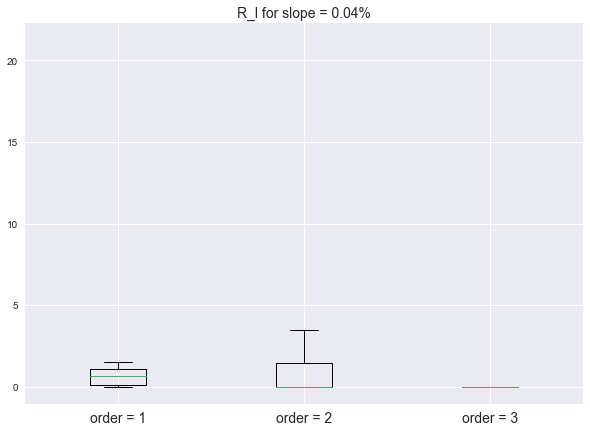

In [305]:
# boxplot of R_l
sns.set()
plt.figure(figsize=(10,7))
plt.boxplot(rl.T[:,0:3])
plt.xticks([1, 2, 3], ['order = 1', 'order = 2', 'order = 3'],fontsize=14)
plt.xlabel('')
plt.ylabel('',fontsize=14)
plt.title('R_l for slope = 0.04%',fontsize=14)
plt.show()

In [358]:
#test if data is normally distributed
stat.normaltest(rb.T[:,2])

NormaltestResult(statistic=0.6272217750054466, pvalue=0.730803337553362)

In [322]:
#Functions used to calculate R_l and frac dimension
def calc_len_ratio(order_arr, segm_dict):

    length_node_list = segm_dict.values()
    length_order_set_list = list(zip(order_arr, length_node_list))

    R_l = []
    avg_len_path_dict = {}

    for order, length in length_order_set_list:
        if order not in avg_len_path_dict:
            avg_len_path_dict[order] = [length]
        else:
            avg_len_path_dict[order].append(length)

    for key, value in avg_len_path_dict.items():
        avg_len_path_dict[key] = sum(value)/len(value)

    for i in range(len(avg_len_path_dict), 1, -1):
        R_l.append(avg_len_path_dict[i]/avg_len_path_dict[i - 1])
    return R_l


def calc_fractal_dim(ratio_bifcation, ratio_length):
#     if np.isinf(ratio_length)
#     ratio_length[np.isinf(ratio_length)] = 1
    try:
        return sum(np.log(ratio_bifcation)/np.log(ratio_length))
    except ZeroDivisionError:
        return 0
        

In [74]:
##Calculate relation slope and area

names = []
slopes = [0.0001,0.0002,0.0004,0.0006,0.0008,0.001]
all_total_size = np.zeros((len(slopes),30))

for i in range(1,31):
    for s in slopes:
        names.append('path_matrix_with_slope_' + str(s) +'_version_' + str(i) +'.csv')
        
        
count = 0
        
for h in range(0,30):
    for s in range(0,6):
        count += 1
    
        riv_mat = pd.read_csv(names[count],header=None)

        total_size = 0

        for i in range(len(riv_mat)):
            loc_riv = np.where(riv_mat.loc[i,:] > 0)
            if len(loc_riv[0]) > 0:
                total_size += np.max(loc_riv) - (np.min(loc_riv)-1)
        
        all_total_size[s,h] = total_size


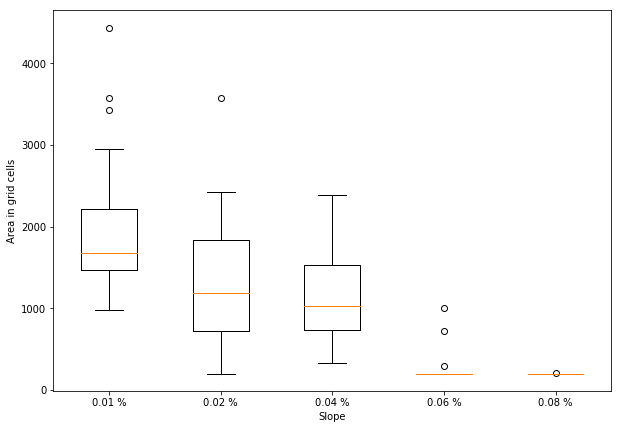

In [101]:
plt.figure(figsize=(10,7))

plt.boxplot((all_total_size[0].T,all_total_size[1].T,all_total_size[5].T,all_total_size[3].T,all_total_size[4].T))
plt.xticks([1, 2, 3,4,5], ['0.01 %', '0.02 %', '0.04 %','0.06 %','0.08 %'])
plt.xlabel('Slope')
plt.ylabel('Area in grid cells')
plt.show()

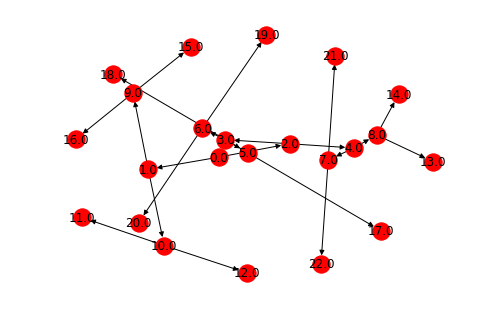

In [160]:
Graph = nx.DiGraph(data_split)



nx.draw_spring(Graph, with_labels=labels, color='blue')